# Data Visualization
---

This script takes 'cleaned' data as an input. Before perform regression on the data, we explore various features and their relation to target, rent price.

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# set style sheet
plt.style.use("ggplot")
#plt.style.use("fivethirtyeight")
#sns.set_style("whitegrid")
sns.set_style("white")

In [4]:
# import cleaned dataset
df = pd.read_csv("data/ny_rental_data_cleaned.r1.csv", index_col=0)

## Number of bedrooms

First, let's see what the most common number of bedrooms are. We make countplot using Seaborn. The plot shows that 1 bedroom is the most common type in Manhattan and Bronx, and other boroughs tend to have more bedrooms.

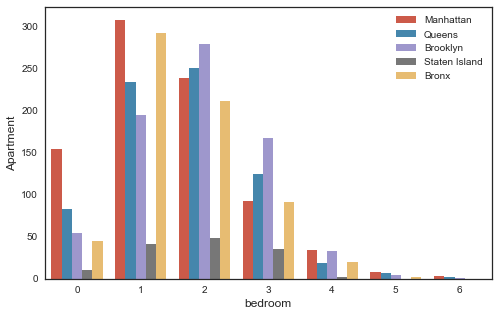

In [5]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8, 5))

# plot bedroom counts
sns.countplot("bedrooms", data=df, ax=ax, hue="borough")

# customize plots
ax.set_xlabel("bedroom")
ax.set_ylabel("Apartment")
plt.legend(loc=1)

## Boroughs

Next, we count number of apartment listings in each borough. Countplot is made using Seaborn, and the plot shows that we have ~700 apartment listings in all boroughs except Staten Island in which only ~100 apartment listings are available.

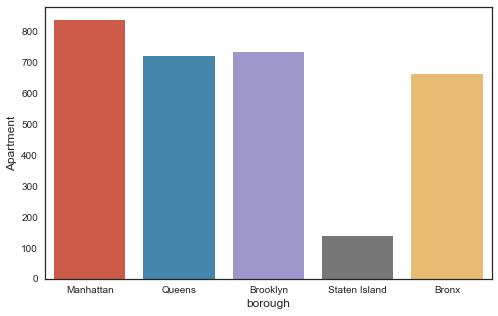

In [6]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8, 5))

# plot bedroom counts
sns.countplot("borough", data=df, ax=ax)

# customize plots
ax.set_ylabel("Apartment")

## Relationship between rent and bedrooms

The relationship between rent and number of bedrooms is plotted using Seaborn barplot. The plot is separated into boroughs. The plot shows that rent is higher for more number of bedrooms as expected. However, the rent difference between 3 to 5 bedrooms is not very large. The plot also shows that we have limited statistics for 6 bedroom apartments.

(0, 15000)

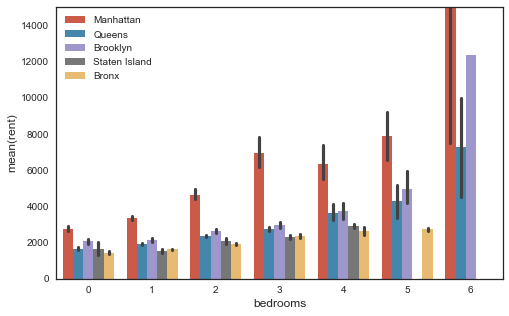

In [7]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8,5))

# create bar plot
sns.barplot(x="bedrooms",y="rent", data=df, ax=ax, hue="borough")

# customize plots
ax.legend()
ax.set_ylim([0,15000])

## Relationship between rent and apartment rating

The relationship between rent and apartment rating is plotted using barplot. The plot is separated into boroughs. The plot shows that the average rent is slightly higher for the apartments with higher rating, though the difference isn't very large.

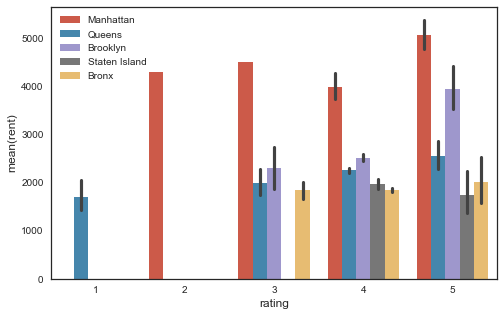

In [8]:
# set subplots
fig, ax = plt.subplots(1,1,figsize=(8,5))

# create bar plot
sns.barplot(x="rating",y="rent", data=df, ax=ax, hue="borough")

# customize plots
ax.legend()
plt.legend(loc=2)

## Pet policy

Next, the average rent is compared between different pet policy. The bar plot shows that there is a significant difference between rent dependig on dog/cat policy.

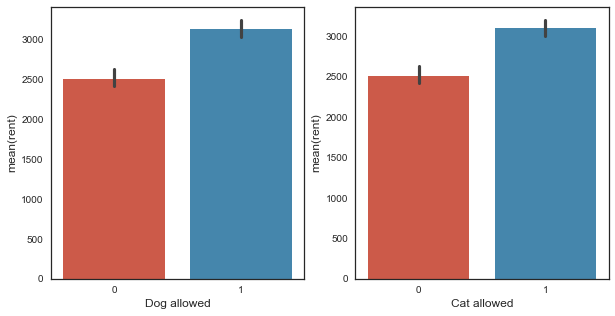

In [9]:
# set subplots
fig, ax = plt.subplots(1,2,figsize=(10,5))

# create bar plot
sns.barplot(x="pet_dog",y="rent", data=df, ax=ax[0])
sns.barplot(x="pet_cat",y="rent", data=df, ax=ax[1])

# customize plots
ax[0].set_xlabel("Dog allowed")
ax[1].set_xlabel("Cat allowed")

## Amenities

In the data frame, amenities are stored as dummy variables. The average rent is compared between apartments with and without an amenity. Only selected amenities are plotted here. They are:
- Washer/dryer in unit
- Business center
- Fitness center
- Furnished
- Gated
- Pet care service
- Yoga studio
- Package service
- Concierge

The plots shows that some amenities such as washer/dryer in unit, business center, or fitness center have large impact on the rent. However, there are amenties that do not have significant influence on rent, such as 'gated'.

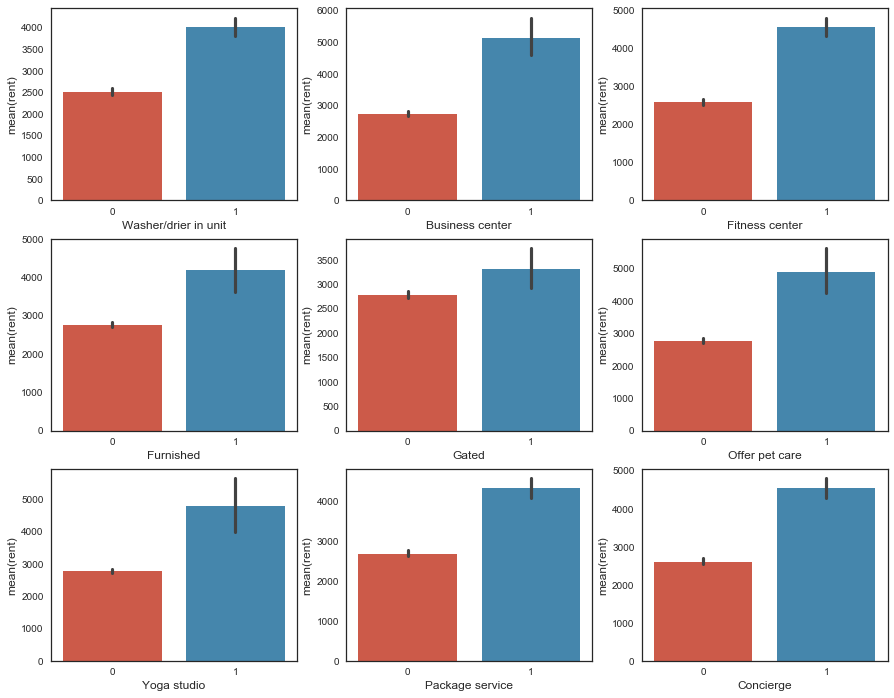

In [73]:
# set subplots
fig, ax = plt.subplots(3,3,figsize=(15,12))

# create bar plot
#sns.barplot(x=["amenity_washer/dryer","amenity_business"],y="rent", data=df, ax=ax[0,0])
sns.barplot(x="amenity_washer/dryer",y="rent", data=df, ax=ax[0,0])
sns.barplot(x="amenity_business",y="rent", data=df, ax=ax[0,1])
sns.barplot(x="amenity_fitness",y="rent", data=df, ax=ax[0,2])
sns.barplot(x="amenity_furnished",y="rent", data=df, ax=ax[1,0])
sns.barplot(x="amenity_gated",y="rent", data=df, ax=ax[1,1])
sns.barplot(x="amenity_pet care",y="rent", data=df, ax=ax[1,2])
sns.barplot(x="amenity_yoga studio",y="rent", data=df, ax=ax[2,0])
sns.barplot(x="amenity_package",y="rent", data=df, ax=ax[2,1])
sns.barplot(x="amenity_concierge",y="rent", data=df, ax=ax[2,2])


# customize plots
ax[0,0].set_xlabel("Washer/drier in unit")
ax[0,1].set_xlabel("Business center")
ax[0,2].set_xlabel("Fitness center")
ax[1,0].set_xlabel("Furnished")
ax[1,1].set_xlabel("Gated")
ax[1,2].set_xlabel("Offer pet care")
ax[2,0].set_xlabel("Yoga studio")
ax[2,1].set_xlabel("Package service")
ax[2,2].set_xlabel("Concierge")

## Relationship between rent and apartment size (sqft)

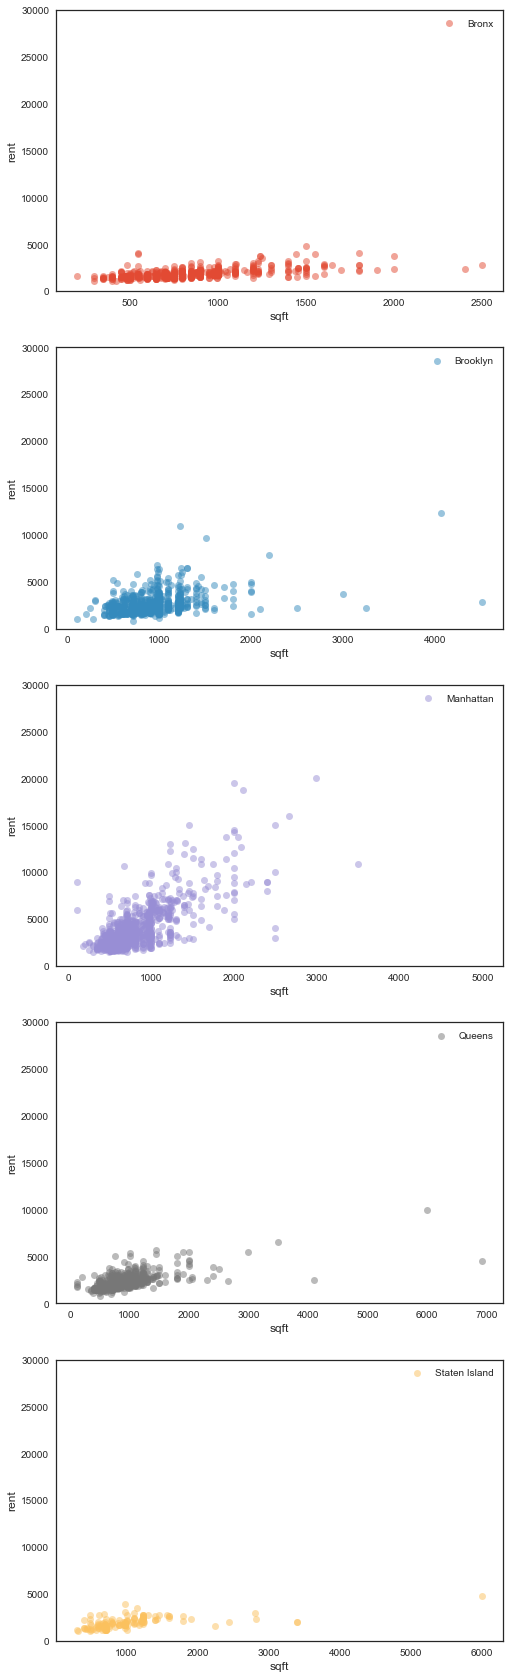

In [68]:
# set subplots
fig, ax = plt.subplots(5,1,figsize=(8,30))

# create regression plot (scatter)
ax_count = 0
for borough, df_borough in df.groupby("borough"):
    sns.regplot("sqft", "rent", df_borough, fit_reg=False, label=borough, scatter_kws={'alpha':0.5}, ax=ax[ax_count])
    ax_count = ax_count+1

# customize plots
for i in range(len(ax)):
    ax[i].legend()
    ax[i].set_ylim([0,30000])